#**AHMAD FAUZHAN RAMADHAN - H071221062**






















































































###**Deskripsi Data**
Kumpulan data yang menunjukkan apakah suatu kanker itu jinak atau ganas menurut karakteristik masing-masing.
1. Benign cancer (B) => Kanker Jinak (0)

2. Malignant cancer (M) => Kanker Ganas (1)

###**1. Seleksi Unvariate**

In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# memuat data
data = pd.read_csv("/content/Cancer_Data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# mengubah data diagnosis dari B -> 0 dan M -> 1, karena diagnosis menjadi variabel target dan harus numerik
data['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

In [ ]:
# memilih data yang dibutuhkan
data = pd.read_csv("/content/Cancer_Data.csv")
x = data.iloc[:,2:32]  #independent colums
y = data.iloc[:,1]    # target colum i.e diagnosis

In [ ]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score')  #print 10 best features

,Specs,Score
23,area_worst,112598.431564
3,area_mean,53991.655924
13,area_se,8758.504705
22,perimeter_worst,3665.035416
2,perimeter_mean,2011.102864
20,radius_worst,491.689157
0,radius_mean,266.104917
12,perimeter_se,250.571896
21,texture_worst,174.449400
1,texture_mean,93.897508


###**2. Feature Importance**

In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
# memilih data yang dibutuhkan
x = data.iloc[:,2:32]  #independent colums
y = data.iloc[:,1]    # target colum i.e diagnosis

In [ ]:
# mengubah data diagnosis dari B -> 0 dan M -> 1, karena diagnosis menjadi variabel target dan harus numerik
data['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

In [ ]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(x,y)
model.feature_importances_ #use inbuilt class feature_importances of tree based classifiers

array([0.06849837, 0.01651529, 0.06182347, 0.07027908, 0.01054883,
       0.03051404, 0.05864105, 0.10056468, 0.00812502, 0.00693564,
       0.01638979, 0.00516228, 0.02478454, 0.0279192 , 0.00751671,
       0.00767651, 0.00854115, 0.01042141, 0.00624698, 0.00617504,
       0.06111842, 0.02230431, 0.07485151, 0.08043387, 0.02116588,
       0.02668469, 0.05588866, 0.08039571, 0.01558349, 0.00829436])

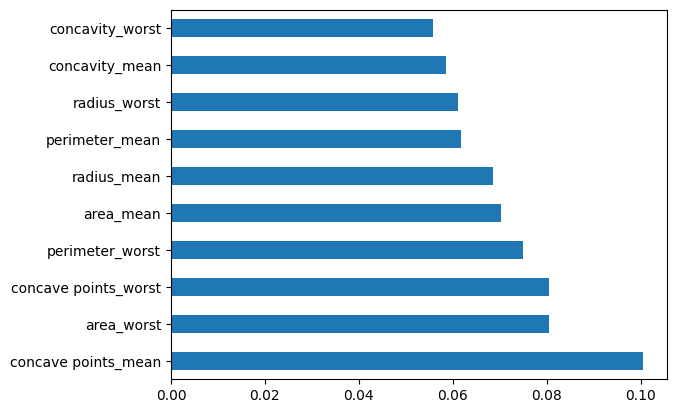

In [ ]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

###**3. Matriks Korelasi dengan Heatmap**

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# memilih data yang dibutuhkan
data = pd.read_csv("/content/Cancer_Data.csv")
x = data.iloc[:,2:32]  #independent colums
y = data.iloc[:,1]    # target colum i.e diagnosis

In [ ]:
# mengubah data diagnosis dari B -> 0 dan M -> 1, karena diagnosis menjadi variabel target dan harus numerik
data['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

In [ ]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

**Matriks Korelasi dengan Heatmap**

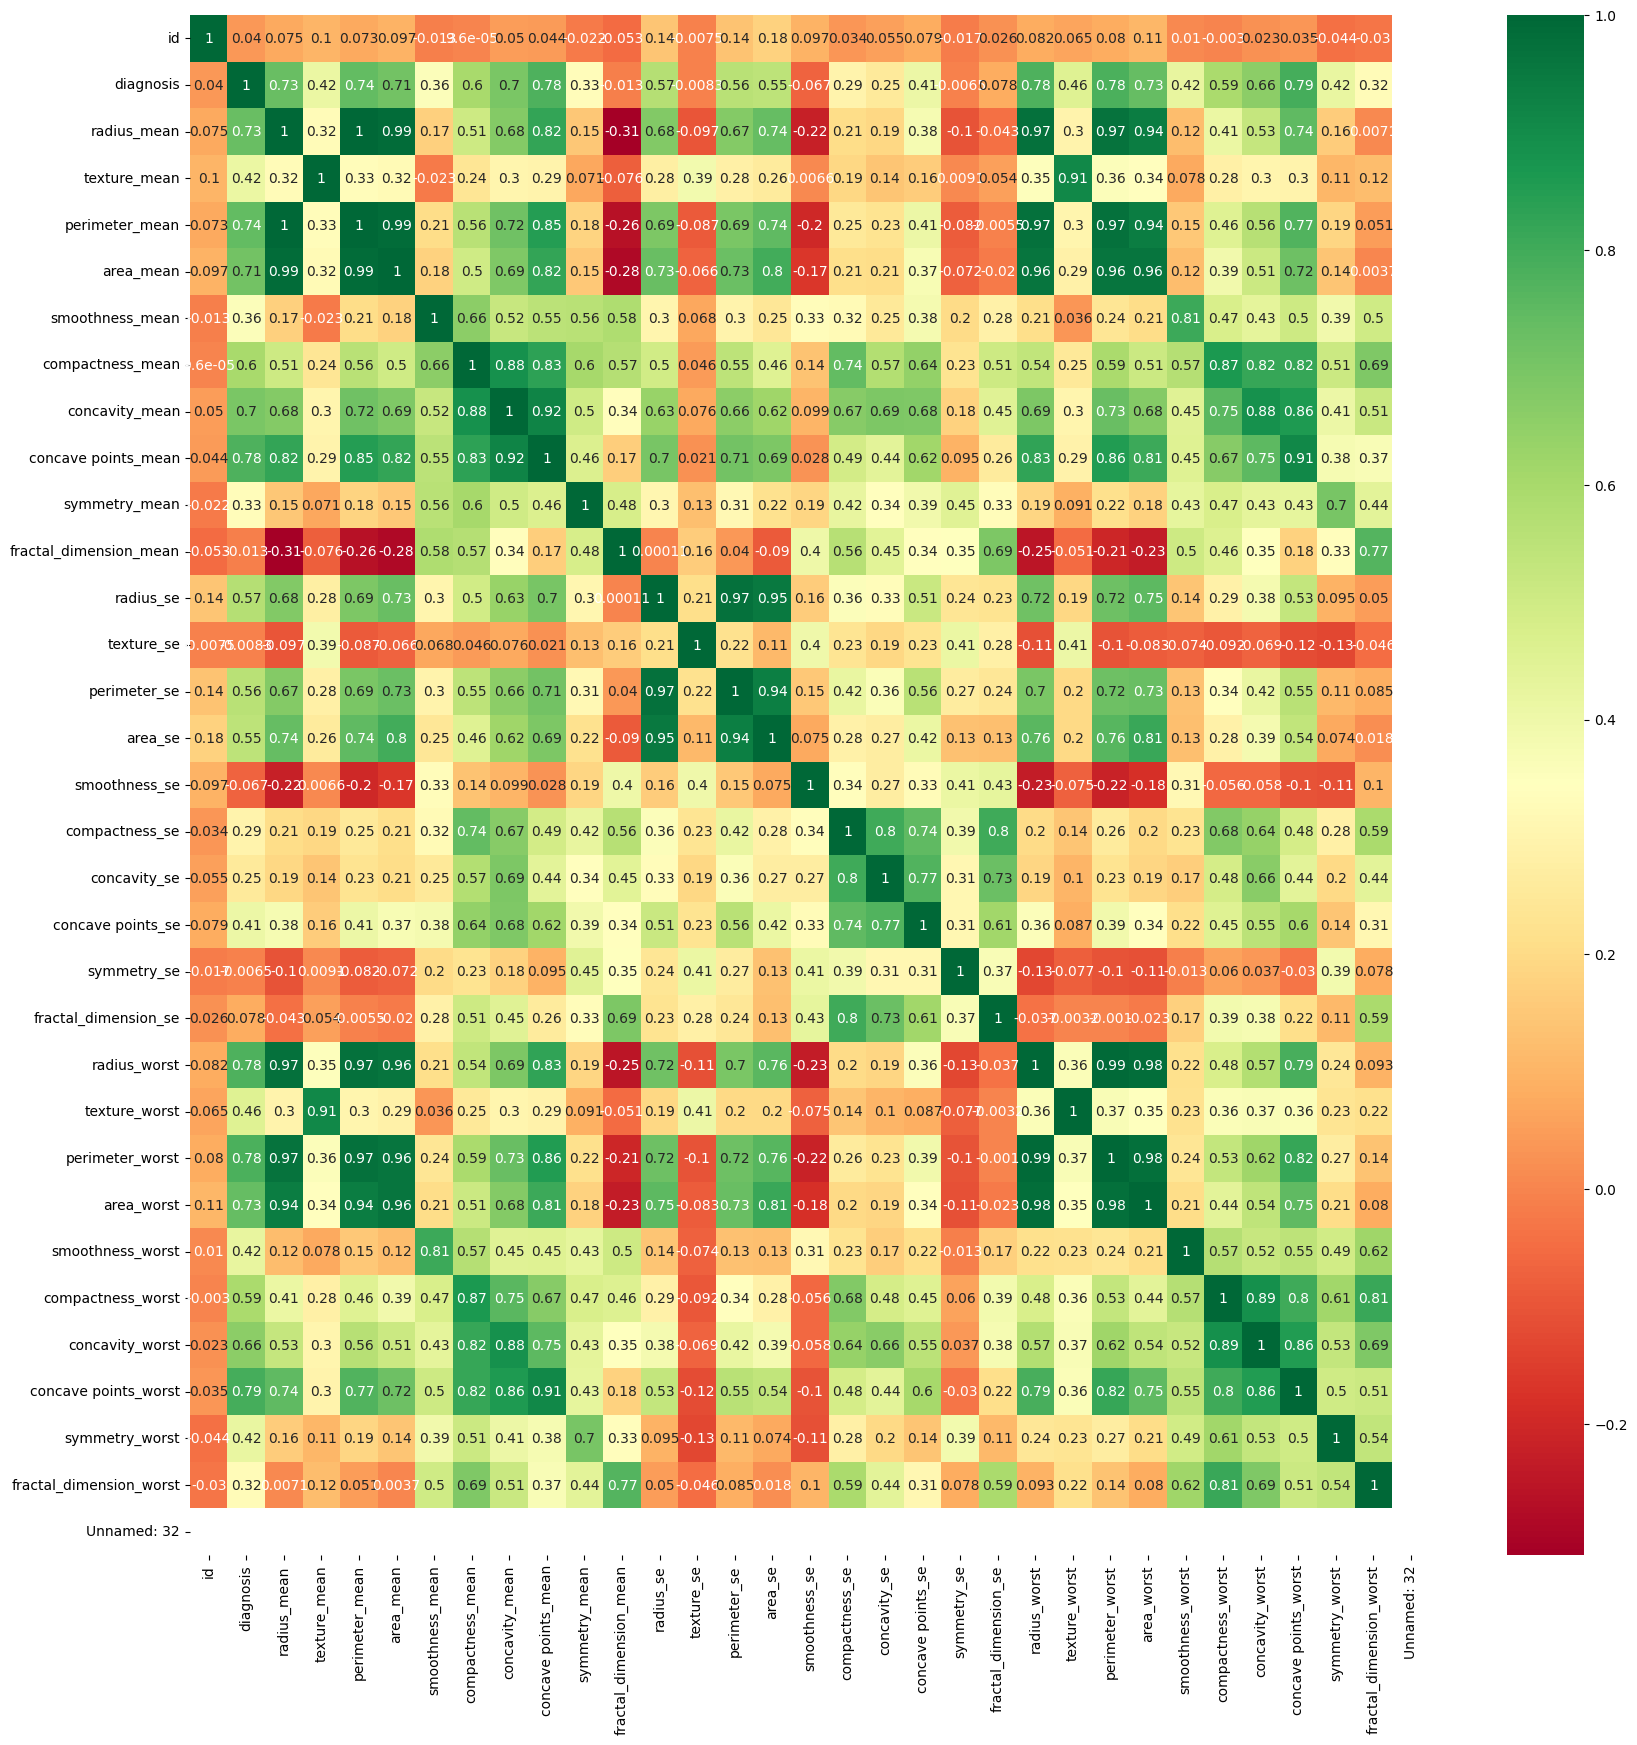

In [ ]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

####**Kesimpulan dari Heatmap:**
Terdapat pola korelasi positif yang teramati antara diagnosis dan beberapa variabel fitur. Tiga variabel fitur dengan korelasi positif tertinggi adalah 'concave points_worst', 'perimeter_worst', dan 'radius_worst', dengan korelasi yang cukup signifikan, mendekati angka 0.7.

Di sisi lain, diagnosis tidak menunjukkan korelasi yang signifikan, bahkan hampir tidak ada korelasi sama sekali, dengan variabel fitur seperti 'symmetry_se' dan 'fractal_dimension_se'. Korelasi ini mendekati nol, sehingga bisa dikatakan tidak ada hubungan yang terukur antara diagnosis dan kedua variabel fitur tersebut.

Selain itu, perlu diperhatikan bahwa terdapat korelasi negatif yang lemah antara diagnosis dan 'smoothness_se', meskipun nilainya mendekati nol (-0.067). Meskipun terdapat korelasi negatif lemah, hubungan ini juga dapat dianggap tidak signifikan dalam konteks analisis.